In [1]:
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from utils.wrangle import wrangle


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('data/commodity_prices.csv')
df = wrangle(df)

df.describe(include='all')

,Product_Type,Arrival_Date,Market,Is_VFPCK,Season,Modal_Price,Max_Price,Min_Price
count,97646,97646,97646,97646,97646,97646.000000,97646.000000,97646.000000
unique,114,NaN,28,2,4,NaN,NaN,NaN
top,Banana|Nendra Bale|Large,NaN,North Paravur,False,Southwest Monsoon,NaN,NaN,NaN
freq,3814,NaN,13064,80553,41551,NaN,NaN,NaN
mean,NaN,2025-01-06 19:41:31.604367104,NaN,NaN,NaN,5361.754419,6021.509033,4775.422176
min,NaN,2024-06-02 00:00:00,NaN,NaN,NaN,300.000000,0.000000,0.000000
25%,NaN,2024-09-23 00:00:00,NaN,NaN,NaN,3000.000000,3500.000000,2500.000000
50%,NaN,2025-01-15 00:00:00,NaN,NaN,NaN,4500.000000,5000.000000,4000.000000
75%,NaN,2025-04-24 00:00:00,NaN,NaN,NaN,6000.000000,6500.000000,5500.000000
max,NaN,2025-08-04 00:00:00,NaN,NaN,NaN,90000.000000,110000.000000,75000.000000


In [4]:
# Group prices by season
groups = [group['Modal_Price'].values for name, group in df.groupby('Season')]

# Run one-way ANOVA
anova_result = f_oneway(*groups)
print(anova_result)

F_onewayResult(statistic=np.float64(77.13541241089686), pvalue=np.float64(7.86512666355688e-50))


In [5]:
anova_results = {}

for product_type, group in df.groupby('Product_Type'):
    seasonal_groups = [seasonal_group['Modal_Price'].values for name, seasonal_group in group.groupby('Season')]

    if len(seasonal_groups) >= 2:
        stat, pval = f_oneway(*seasonal_groups)
        anova_results[product_type] = {'F-statistic': stat, 'p-value': pval}

# Convert to DataFrame for sorting/filtering
anova_df = pd.DataFrame(anova_results).T.reset_index().rename(columns={'index': 'Product_Type'})

anova_df = anova_df.sort_values(by='p-value', ascending=True).reset_index(drop=True)
anova_df

,Product_Type,F-statistic,p-value
0,Banana - Green|Banana - Green|FAQ,910.842569,0.000000e+00
1,Banana|Nendra Bale|Large,1217.391616,0.000000e+00
2,Onion|Big|FAQ,493.364342,2.991365e-224
3,Ashgourd|Ashgourd|FAQ,407.829913,6.973649e-223
4,Drumstick|Drumstick|FAQ,448.239732,1.190074e-219
5,Ginger(Green)|Green Ginger|FAQ,388.416562,1.819221e-190
6,Banana|Palayamthodan|Large,327.869077,3.214126e-179
7,Green Chilli|Green Chilly|FAQ,293.588116,5.858009e-157
8,Carrot|Carrot|FAQ,281.799611,1.868369e-151
9,Amphophalus|Amphophalus|FAQ,310.315342,1.611693e-142


Most commodities (>90%) show strong seasonal price variation.
High seasonal impact: Banana (Nendra Bale, Green), Ashgourd, Ginger (Green), Bitter Gourd, Drumstick, Onion (Big).
Low/no seasonal effect: Amaranthus, Cowpea (Bean Barbati), Papaya (Raw), Onion (1st Sort Non-FAQ).
Borderline: French Beans, Water Melon, Amaranthus (Other).
Seasonal swings align with crop perishability and harvest timing.

In [6]:
# Boolean flag: at least one record in VFPCK
vfpck_flag = (
    df.groupby('Product_Type')['Is_VFPCK']
      .any()
      .reset_index()
      .rename(columns={'Is_VFPCK': 'Has_VFPCK'})
)

# Fraction of records in VFPCK
vfpck_stats = (
    df.groupby('Product_Type')['Is_VFPCK']
      .mean()
      .reset_index()
      .rename(columns={'Is_VFPCK': 'Pct_VFPCK'})
)

# Merge both into ANOVA table
vfpck_df = anova_df.merge(vfpck_stats, on='Product_Type', how='left')
vfpck_df = vfpck_df.merge(vfpck_flag, on='Product_Type', how='left')

# Keep only products that have VFPCK presence
vfpck_df = vfpck_df[vfpck_df['Has_VFPCK'] == True]

# Sort if needed
vfpck_df = vfpck_df.sort_values('p-value').reset_index(drop=True)

# Display the final DataFrame
vfpck_df

,Product_Type,F-statistic,p-value,Pct_VFPCK,Has_VFPCK
0,Banana - Green|Banana - Green|FAQ,910.842569,0.000000e+00,0.260853,True
1,Banana|Nendra Bale|Large,1217.391616,0.000000e+00,0.873361,True
2,Ashgourd|Ashgourd|FAQ,407.829913,6.973649e-223,0.268340,True
3,Ginger(Green)|Green Ginger|FAQ,388.416562,1.819221e-190,0.001829,True
4,Banana|Palayamthodan|Large,327.869077,3.214126e-179,0.862737,True
5,Amphophalus|Amphophalus|FAQ,310.315342,1.611693e-142,0.043651,True
6,Bitter gourd|Bitter Gourd|FAQ,200.957072,1.253015e-115,0.089395,True
7,Ashgourd|Other|FAQ,115.542313,3.425063e-60,0.001499,True
8,Cucumbar(Kheera)|Cucumbar|FAQ,98.238547,4.802033e-60,0.310387,True
9,Tapioca|Tapioca|FAQ,83.512777,2.064807e-51,0.162196,True


“VFPCK’s work has increased market access for farmers, but our analysis shows seasonal price swings remain high — even for commodities where VFPCK has significant market share.
Given the perishability of these crops, full-season storage is unrealistic. Instead, investments in value addition, short-term cold chain, market diversification, and forward contracting could better stabilize farmer incomes.”

In [ ]:
two_way_results = []

for product_type, group in df.groupby('Product_Type'):
    # Only keep products sold in 2+ markets and 2+ seasons
    if group['Market'].nunique() > 1 and group['Season'].nunique() > 1:
        model = ols('Modal_Price ~ C(Season) + C(Market) + C(Season):C(Market)', data=group).fit()
        anova_table = anova_lm(model, typ=2)  # Type II ANOVA

        two_way_results.append({
            'Product_Type': product_type,
            'Season_F_pval': anova_table.loc['C(Season)', 'PR(>F)'],
            'Market_F_pval': anova_table.loc['C(Market)', 'PR(>F)'],
            'Interaction_F_pval': anova_table.loc['C(Season):C(Market)', 'PR(>F)']
        })

two_way_df = pd.DataFrame(two_way_results)

# Sort by strongest market effect
two_way_df = two_way_df.sort_values('Market_F_pval')
two_way_df

/Users/aswinbenny/Downloads/projects/commodity_pricing/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/Users/aswinbenny/Downloads/projects/commodity_pricing/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 12
  warnings.warn('covariance of constraints does not have full '
/Users/aswinbenny/Downloads/projects/commodity_pricing/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/Users/aswinbenny/Downloads/projects/commodity_pricing/.venv/lib/python3.10/site-packages/statsmodels/base

,Product_Type,Season_F_pval,Market_F_pval,Interaction_F_pval
0,Amaranthus|Amaranthus|FAQ,1.029777e-18,0.000000e+00,1.360684e-58
82,Tapioca|Other|FAQ,1.303052e-18,0.000000e+00,2.755747e-43
27,Cabbage|Cabbage|FAQ,2.226597e-181,0.000000e+00,1.765692e-05
25,Brinjal|Brinjal|FAQ,9.341118e-72,0.000000e+00,3.742713e-10
22,Bottle gourd|Bottle Gourd|FAQ,1.166003e-50,0.000000e+00,9.464263e-48
21,Black pepper|Garbled|FAQ,4.209921e-11,0.000000e+00,8.866353e-65
43,Cucumbar(Kheera)|Other|FAQ,5.625295e-58,0.000000e+00,2.285771e-19
78,Pumpkin|Pumpkin|FAQ,2.872798e-135,8.421619e-317,2.468434e-15
39,Colacasia|Other|FAQ,1.283104e-07,1.168202e-315,4.267181e-58
33,Cauliflower|Cauliflower|FAQ,6.038207e-95,1.101528e-290,1.401943e-05


In [7]:
df['Market'].unique()

array(['North Paravur', 'Angamaly', 'Ernakulam', 'Perumbavoor',
       'Broadway market', 'Aluva', 'Keezhampara VFPCK', 'Kothamangalam',
       'Piravam', 'Thrippunithura', 'Nedungapra  VFPCK',
       'Edackattuvayal  VFPCK', 'Mazhuvannur VFPCK', 'Koovapadi VFPCK',
       'Thiruvaniyoor  VFPCK', 'Amalapuram  VFPCK', 'KARUMALOOR VFPCK',
       'Moovattupuzha', 'Puthenvelikkara  VFPCK', 'Kunnukara  VFPCK',
       'Malayattoor  VFPCK', 'Mookkannur  VFPCK', 'Kadungallur  VFPCK',
       'THURAVOOR VFPCK', 'KURUMASSERY VFPCK', 'POTHANIKKADU VFPCK',
       'KANJOOR VFPCK', 'Vengola  VFPCK'], dtype=object)

In [7]:
df.drop_duplicates().shape

(97646, 8)

In [8]:
df.shape

(97646, 8)

In [10]:
df.tail(n=50)

,Product_Type,Arrival_Date,Market,Is_VFPCK,Season,Modal_Price,Max_Price,Min_Price
97596,Water Melon|Water Melon|Large,2025-05-05,Piravam,False,Summer,2000.0,2500.0,1800.0
97597,Water Melon|Water Melon|Large,2025-05-06,Piravam,False,Summer,2000.0,2500.0,1800.0
97598,Water Melon|Water Melon|Large,2025-05-08,Piravam,False,Summer,2500.0,3000.0,1800.0
97599,Water Melon|Water Melon|Large,2025-05-09,Piravam,False,Summer,2000.0,2500.0,1600.0
97600,Water Melon|Water Melon|Large,2025-05-10,Piravam,False,Summer,1600.0,2500.0,1200.0
97601,Water Melon|Water Melon|Large,2025-05-12,Piravam,False,Summer,3500.0,4000.0,3000.0
97602,Water Melon|Water Melon|Large,2025-05-13,Piravam,False,Summer,2000.0,2200.0,1800.0
97603,Water Melon|Water Melon|Large,2025-05-14,Piravam,False,Summer,2000.0,2200.0,1600.0
97604,Water Melon|Water Melon|Large,2025-05-16,Piravam,False,Summer,1400.0,2000.0,1200.0
97605,Water Melon|Water Melon|Large,2025-05-18,Piravam,False,Summer,2000.0,2500.0,1500.0


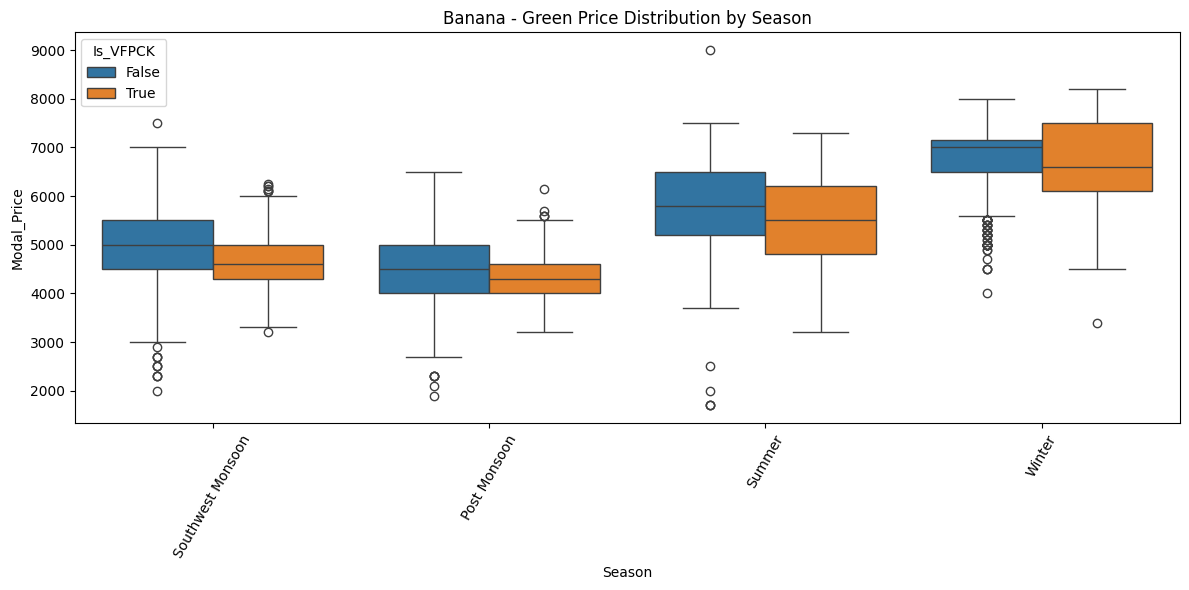

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df[df['Commodity'] == 'Banana - Green'], x='Season', y='Modal_Price', hue='Is_VFPCK',ax=ax)
ax.set_title('Banana - Green Price Distribution by Season')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

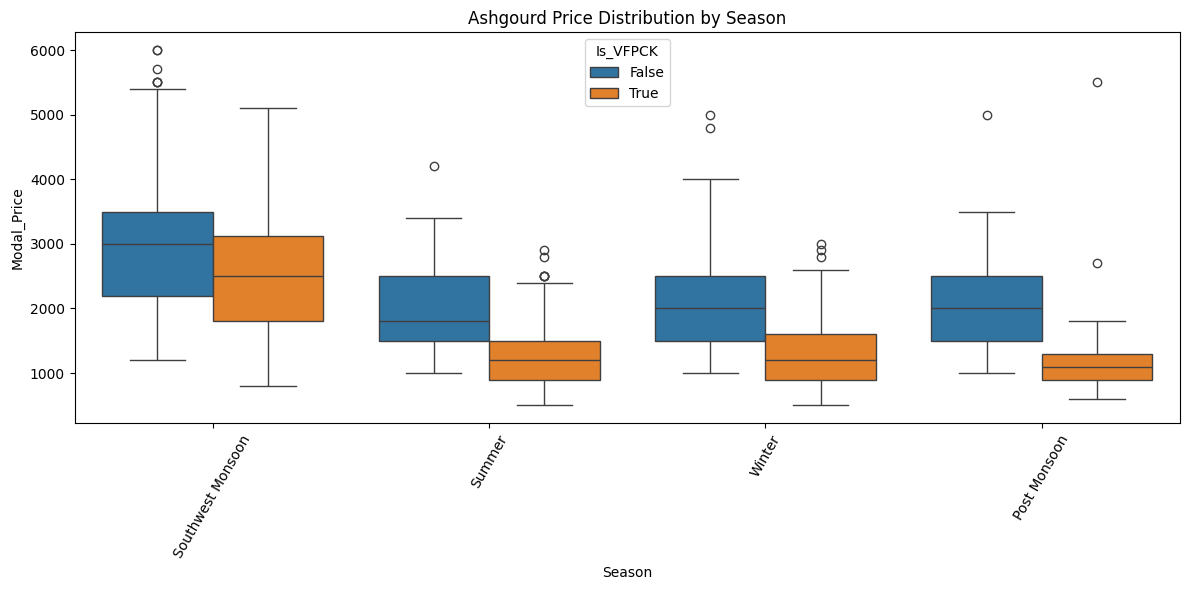

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df[df['Commodity'] == 'Ashgourd'], x='Season', y='Modal_Price', hue='Is_VFPCK',ax=ax)
ax.set_title('Ashgourd Price Distribution by Season')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

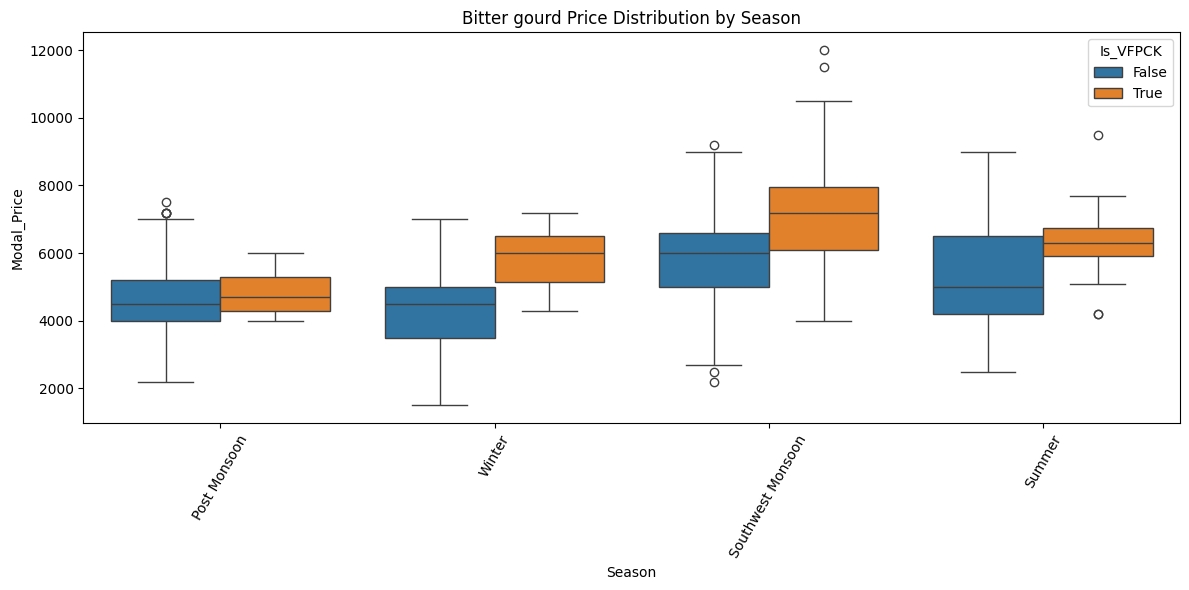

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df[df['Commodity'] == 'Bitter gourd'], x='Season', y='Modal_Price', hue='Is_VFPCK',ax=ax)
ax.set_title('Bitter gourd Price Distribution by Season')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

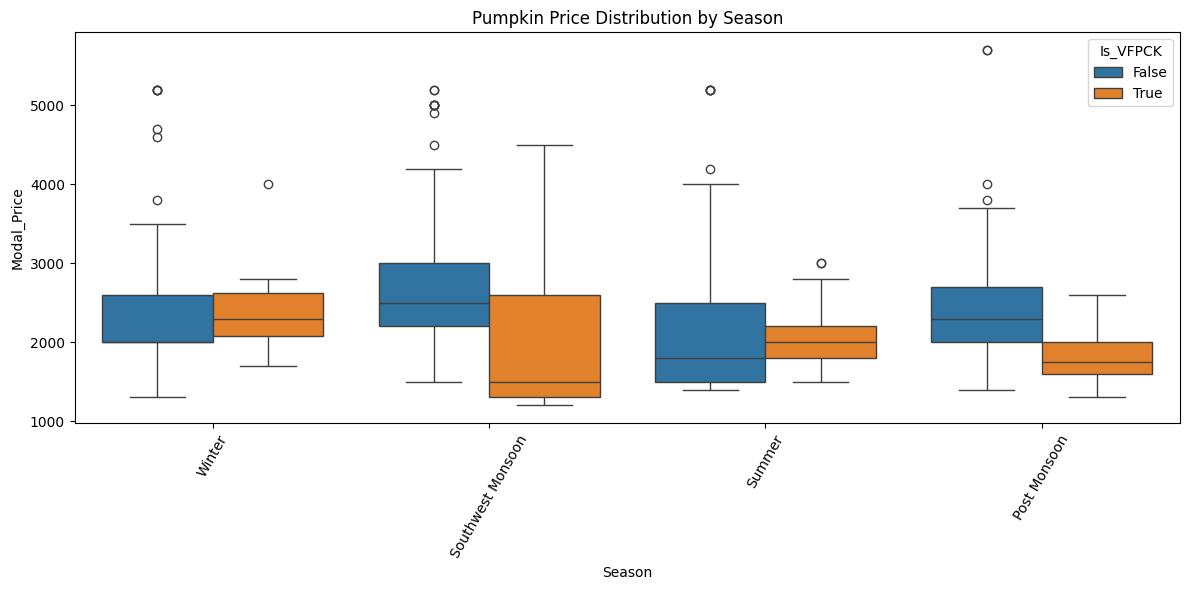

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df[df['Commodity'] == 'Pumpkin'], x='Season', y='Modal_Price', hue='Is_VFPCK',ax=ax)
ax.set_title('Pumpkin Price Distribution by Season')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [9]:
df.shape

(97727, 13)

In [36]:
df.groupby('Season')['Modal_Price'].mean().sort_values(ascending=False)

Season
Post Monsoon         5549.938006
Southwest Monsoon    5537.070099
Winter               5512.336498
Summer               4785.036447
Name: Modal_Price, dtype: float64

In [37]:
avg_prices = df.groupby(['Commodity', 'Is_VFPCK'])['Modal_Price'].mean().unstack()
avg_prices

Is_VFPCK,False,True
Commodity,,
Alsandikai,4366.463415,NaN
Amaranthus,3529.409401,4650.000000
Amla(Nelli Kai),5839.634146,NaN
Amphophalus,6573.954984,4752.272727
Arecanut(Betelnut/Supari),28798.511905,NaN
Ashgourd,2426.073514,1744.169697
Banana,4117.953807,3787.923412
Banana - Green,5459.029126,5223.676681
Beetroot,5042.390139,NaN


In [38]:
price_variation = df.groupby(['Commodity', 'Is_VFPCK'])['Modal_Price'].std().unstack()

price_variation

Is_VFPCK,False,True
Commodity,,
Alsandikai,855.797101,NaN
Amaranthus,928.156219,826.351707
Amla(Nelli Kai),716.952342,NaN
Amphophalus,1003.916763,570.547936
Arecanut(Betelnut/Supari),3089.437594,NaN
Ashgourd,876.377859,970.394310
Banana,1626.099106,1620.792724
Banana - Green,1123.961590,1102.358536
Beetroot,1695.491094,NaN


In [ ]:
df[df['Commodity'] == 'Tomato'].groupby('Grade')['Modal_Price'].mean()

Grade
FAQ        4111.714507
Non-FAQ    3696.296296
Name: Modal_Price, dtype: float64

In [18]:
df[df['Commodity'] == 'Tomato'].groupby('Season')['Modal_Price'].mean()

Season
Post Monsoon         4643.686869
Southwest Monsoon    4766.466036
Summer               2918.093700
Winter               3570.841121
Name: Modal_Price, dtype: float64

In [19]:
df[df['Commodity'] == 'Tomato'].groupby('Market')['Modal_Price'].mean()

Market
Aluva              3761.688312
Angamaly           4649.834983
Broadway market    4447.528517
Ernakulam          3716.428571
Kothamangalam      3616.613419
North Paravur      3636.085627
Perumbavoor        3694.886364
Piravam            4668.924303
Thrippunithura     4834.493671
Name: Modal_Price, dtype: float64

In [21]:
grouped = df.groupby(['Commodity', 'Market'])['Modal_Price'].mean().reset_index()
cheapest_markets = grouped.loc[grouped.groupby('Commodity')['Modal_Price'].idxmin()]

cheapest_markets.sort_values(by='Commodity', inplace=True)
cheapest_markets.reset_index(drop=True, inplace=True)

cheapest_markets

,Commodity,Market,Modal_Price
0,Alsandikai,North Paravur,4366.463415
1,Amaranthus,North Paravur,2478.963415
2,Amla(Nelli Kai),North Paravur,5839.634146
3,Amphophalus,Nedungapra VFPCK,4116.666667
4,Arecanut(Betelnut/Supari),Perumbavoor,28785.970149
5,Ashgourd,Amalapuram VFPCK,962.500000
6,Banana,Aluva,2694.378698
7,Banana - Green,Keezhampara VFPCK,4927.920228
8,Beetroot,Perumbavoor,3186.968839
9,Bhindi(Ladies Finger),Perumbavoor,3268.926554


In [23]:
cheapest_markets['Market'].value_counts()

Market
North Paravur            11
Perumbavoor              11
Moovattupuzha             6
Kothamangalam             5
Piravam                   5
Aluva                     3
Edackattuvayal  VFPCK     3
Keezhampara VFPCK         2
Angamaly                  2
Thiruvaniyoor  VFPCK      2
Koovapadi VFPCK           2
Nedungapra  VFPCK         1
Amalapuram  VFPCK         1
Mazhuvannur VFPCK         1
KARUMALOOR VFPCK          1
Thrippunithura            1
Name: count, dtype: int64

In [6]:
df[df['Commodity'] == 'Tomato']

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code,Is_VFPCK,Season
94906,Kerala,Ernakulam,Kothamangalam,Tomato,Other,FAQ,2025-01-15,2000.0,4000.0,3000.0,78,False,Winter
94907,Kerala,Ernakulam,Thrippunithura,Tomato,Tomato,FAQ,2025-04-21,3200.0,3800.0,3400.0,78,False,Summer
94908,Kerala,Ernakulam,Aluva,Tomato,Tomato,FAQ,2024-06-15,6000.0,7000.0,6500.0,78,False,Southwest Monsoon
94909,Kerala,Ernakulam,Thrippunithura,Tomato,Tomato,FAQ,2025-04-23,2800.0,3500.0,3000.0,78,False,Summer
94910,Kerala,Ernakulam,Aluva,Tomato,Tomato,FAQ,2024-06-21,8000.0,9000.0,8500.0,78,False,Southwest Monsoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97614,Kerala,Ernakulam,Angamaly,Tomato,Other,FAQ,2025-05-27,3100.0,4000.0,3500.0,78,False,Summer
97615,Kerala,Ernakulam,Angamaly,Tomato,Other,FAQ,2024-09-28,4000.0,5000.0,4500.0,78,False,Southwest Monsoon
97616,Kerala,Ernakulam,Angamaly,Tomato,Other,FAQ,2024-09-24,5000.0,6000.0,5500.0,78,False,Southwest Monsoon
97617,Kerala,Ernakulam,Thrippunithura,Tomato,Tomato,FAQ,2024-12-13,4000.0,5000.0,4200.0,78,False,Winter
